# **PROJECT NAME :** - Strava Fitness Data Analytics Project

**Project Type:**  - Exploratory Data Analysis (EDA) & Business Insights

**Tools Used :** 

Python (Pandas, Matplotlib, Seaborn)

SQL

Power BI

Dataset

Strava Fitness / Smart Device Activity Data

**Objective :**

The objective of this project is to analyze smart fitness device data to understand user activity patterns, calorie expenditure, sleep behavior, and activity intensity. The insights derived from this analysis will help in identifying user behavior trends and providing data-driven recommendations for improving fitness engagement and wellness strategies.

 **Dataset Description**

The dataset consists of multiple CSV files capturing fitness activity recorded by smart devices. The key datasets used in this analysis include:

dailyActivity_merged.csv – Daily summary of steps, calories burned, and activity intensity.

dailySteps_merged.csv – Daily step count data.

dailyCalories_merged.csv – Daily calorie burn information.

dailyIntensities_merged.csv – Activity intensity levels.

sleepDay_merged.csv – Sleep duration and sleep quality.

hourly & minute datasets – Hour-wise and minute-wise activity tracking.

heartrate_seconds_merged.csv – Heart rate measurements.

weightLogInfo_merged.csv – User weight tracking information.

Each record corresponds to a specific user and time period, allowing analysis of activity trends and behavioral patterns.

**Project Workflow**

1. Data loading and understanding

2. Data cleaning and preprocessing

3. Exploratory Data Analysis (EDA)

4. Data visualization

5. Insight generation

6. Business recommendations

This structured approach ensures clarity, accuracy, and actionable outcomes.

# ***Let's Begin !*** 

**Import Required Libraries**

In [18]:
import pandas as pd


### **Load the Dataset**

In [21]:
df = pd.read_csv("Data/dailyActivity_merged.csv")

df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


### **Initial Data Inspection**

In this step, we examine the structure of the dataset to understand the number of rows, columns, and data types.

In [25]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  



### **Data Cleaning**

Data cleaning is performed to ensure accuracy and consistency. This includes checking for missing values, removing duplicate records, and converting date columns into proper datetime format.

In [36]:
# Check missing values
df.isnull().sum()


Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [40]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert date column to datetime
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

### **Relationship Between Steps and Calories**

This visualization helps in understanding whether an increase in the number of steps taken leads to higher calorie burn. Identifying this relationship is important for evaluating the effectiveness of physical activity.

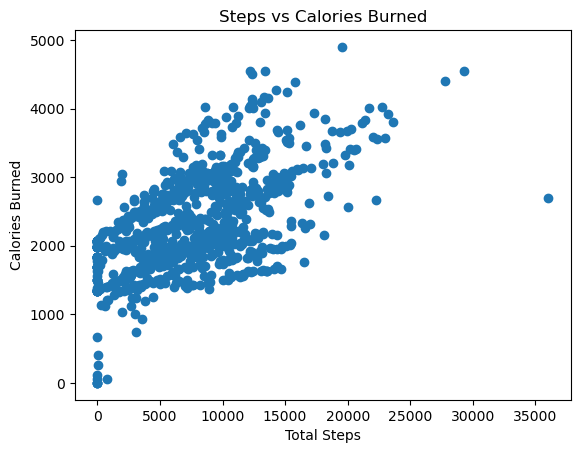

In [46]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['TotalSteps'], df['Calories'])
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")
plt.title("Steps vs Calories Burned")
plt.show()


### **Insight**

The scatter plot shows a positive relationship between total steps and calories burned. As the number of steps increases, calorie expenditure also increases, indicating that walking activity significantly contributes to overall energy burn.

### **Activity Intensity Distribution**

This analysis examines how users distribute their time across different activity intensity levels, such as very active, fairly active, and lightly active minutes.

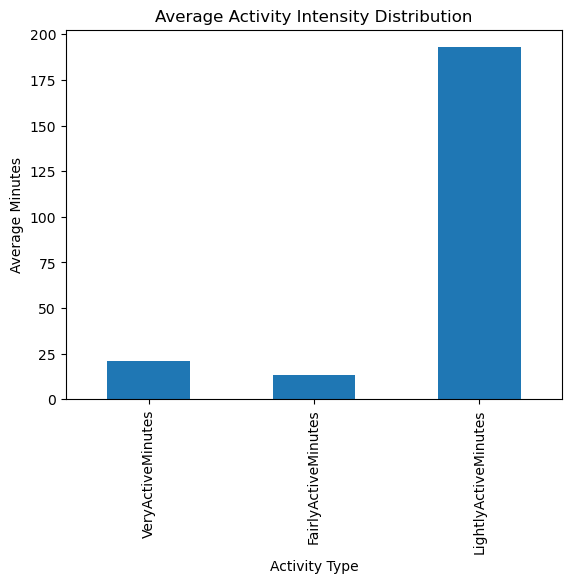

In [50]:
df[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].mean().plot(kind='bar')
plt.xlabel("Activity Type")
plt.ylabel("Average Minutes")
plt.title("Average Activity Intensity Distribution")
plt.show()


### **Insight**

The bar chart indicates that users spend most of their active time in lightly active minutes, while very active minutes are comparatively lower. This suggests that most users engage in low to moderate intensity activities rather than high-intensity workouts.

### **Daily Steps Trend Analysis**

This analysis helps identify trends in user activity over time by examining average daily step counts. Understanding these trends can highlight periods of increased or decreased physical activity.

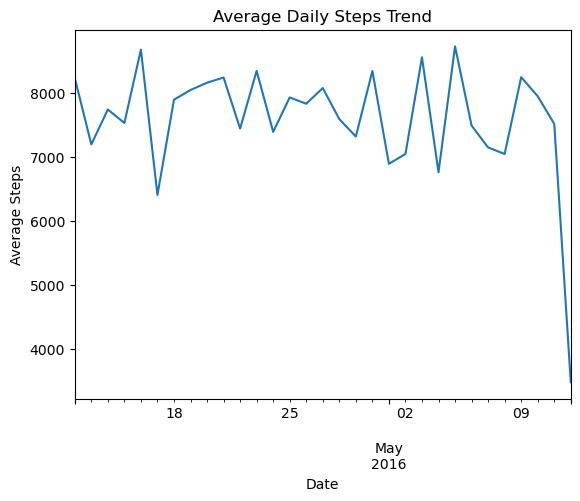

In [54]:
df.groupby('ActivityDate')['TotalSteps'].mean().plot()
plt.xlabel("Date")
plt.ylabel("Average Steps")
plt.title("Average Daily Steps Trend")
plt.show()


### **Insight**

The line chart shows fluctuations in average daily steps over time, indicating variations in user activity levels. Certain days show higher engagement, while others reflect reduced activity, possibly due to routine or lifestyle factors.

In [71]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

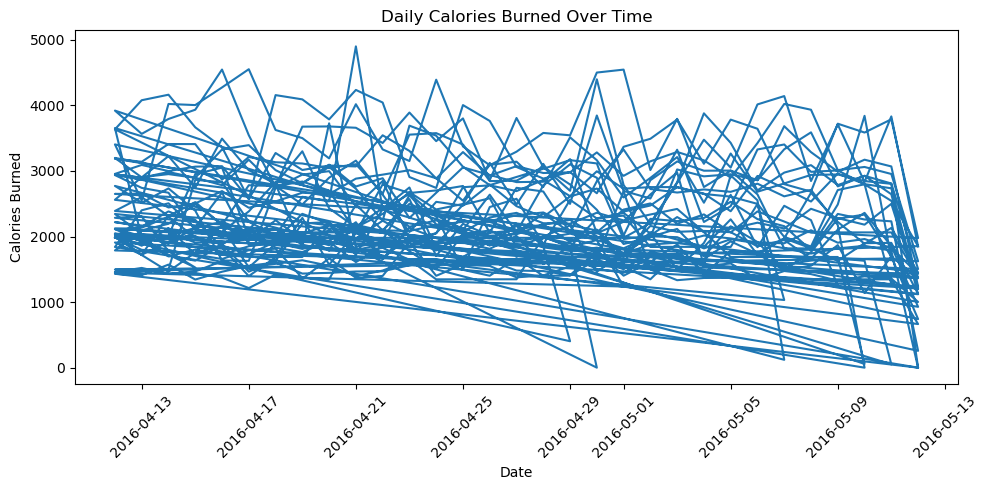

In [73]:
#Daily Calories Burned Over Time

import matplotlib.pyplot as plt



plt.figure(figsize=(10,5))
plt.plot(
    df['ActivityDate'],
    df['Calories']
)

plt.title('Daily Calories Burned Over Time')
plt.xlabel('Date')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


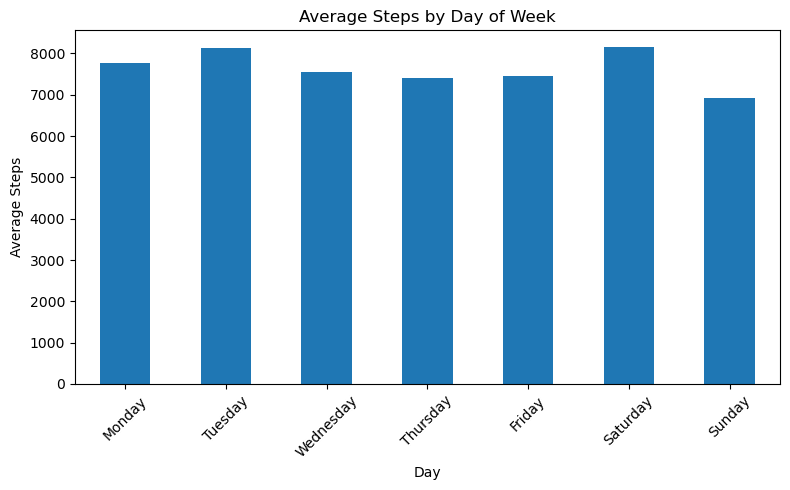

In [77]:
# Average Steps by Day of Week

df['DayName'] = df['ActivityDate'].dt.day_name()

avg_steps_day = df.groupby('DayName')['TotalSteps'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.figure(figsize=(8,5))
avg_steps_day.plot(kind='bar')
plt.title('Average Steps by Day of Week')
plt.xlabel('Day')
plt.ylabel('Average Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight
Users tend to walk more on weekdays compared to weekends, indicating structured daily routines. Weekend activity shows a slight drop, possibly due to rest or leisure-focused behavior.

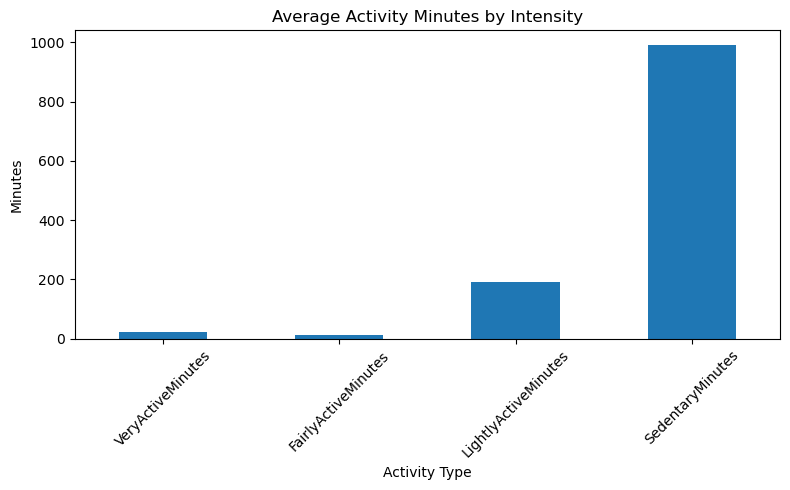

In [81]:
# Activity Minutes Distribution

activity_minutes = df[['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']].mean()

plt.figure(figsize=(8,5))
activity_minutes.plot(kind='bar')
plt.title('Average Activity Minutes by Intensity')
plt.xlabel('Activity Type')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight:

Sedentary minutes dominate daily activity, highlighting a largely inactive lifestyle despite short bursts of active movement. This suggests opportunities for improving overall activity levels.

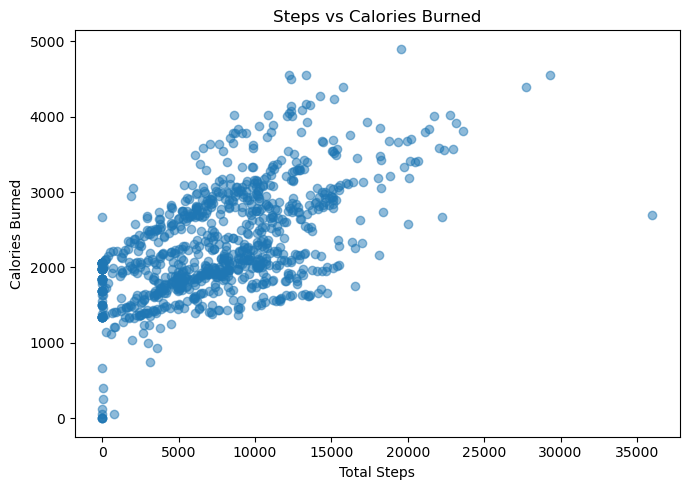

In [84]:
# Calories vs Steps (Relationship)

plt.figure(figsize=(7,5))
plt.scatter(df['TotalSteps'], df['Calories'], alpha=0.5)
plt.title('Steps vs Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.tight_layout()
plt.show()


### Insight:

A positive correlation exists between steps taken and calories burned, confirming that increased physical activity directly contributes to higher calorie expenditure.

### **Conclusion & Business Insights**

This analysis of Strava fitness data reveals meaningful patterns in user activity behavior. Step counts and calorie burn fluctuate over time, with noticeable differences across weekdays. Users tend to spend more time in sedentary and lightly active states, indicating scope for fitness improvement. The strong correlation between steps and calories emphasizes the importance of consistent movement for better health outcomes.

**Recommendations:**

Encourage users to increase daily step targets.

Promote short active breaks to reduce sedentary time.

Design fitness challenges focused on weekday engagement.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***